#### Import Required Packages

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from minisom import MiniSom
from pylab import bone, pcolor, colorbar, plot, show
from sklearn.preprocessing import MinMaxScaler

#### Importing The Dataset

In [19]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [20]:
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


#### Feature Scaling

In [21]:
sc = MinMaxScaler(feature_range=(0,1))
X = sc.fit_transform(X)

#### Initialize The Self-Organizing Map (SOM) using the MiniSom package

In [22]:
som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5)

#### Initialize Weights & Train SOM

In [23]:
som.random_weights_init(X)
som.train_random(X, num_iteration=100)

#### Visualize Self-Organizing Map With Pylab

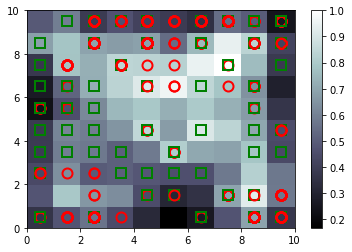

In [28]:
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2,
        )
show()

In [31]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[8,1], mappings[7,7]), axis = 0)
frauds = sc.inverse_transform(frauds)